In [2]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
red_wine_data = pd.read_csv("https://raw.githubusercontent.com/zygmuntz/wine-quality/master/winequality/winequality-red.csv", sep=';')

In [4]:
red_wine_data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [9]:
X = red_wine_data.loc[:, red_wine_data.columns!="quality"]
y = red_wine_data["quality"]
X, y 

(      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
 0               7.4             0.700         0.00             1.9      0.076   
 1               7.8             0.880         0.00             2.6      0.098   
 2               7.8             0.760         0.04             2.3      0.092   
 3              11.2             0.280         0.56             1.9      0.075   
 4               7.4             0.700         0.00             1.9      0.076   
 ...             ...               ...          ...             ...        ...   
 1594            6.2             0.600         0.08             2.0      0.090   
 1595            5.9             0.550         0.10             2.2      0.062   
 1596            6.3             0.510         0.13             2.3      0.076   
 1597            5.9             0.645         0.12             2.0      0.075   
 1598            6.0             0.310         0.47             3.6      0.067   
 
       free su

In [47]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler

In [48]:
ct = make_column_transformer((MinMaxScaler(), ["fixed acidity","volatile acidity","citric acid","residual sugar","chlorides","free sulfur dioxide","total sulfur dioxide","pH","sulphates","alcohol"]))

In [49]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)


In [50]:
ct.fit(X_train)

X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

X_train_normal, X_test_normal

(array([[0.36283186, 0.39041096, 0.31      , ..., 0.58267717, 0.22699387,
         0.49230769],
        [0.13274336, 0.06164384, 0.4       , ..., 0.4015748 , 0.13496933,
         0.53846154],
        [0.55752212, 0.18493151, 0.47      , ..., 0.44094488, 0.23312883,
         0.21538462],
        ...,
        [0.2300885 , 0.34246575, 0.06      , ..., 0.60629921, 0.10429448,
         0.16923077],
        [0.2920354 , 0.05479452, 0.35      , ..., 0.45669291, 0.26380368,
         0.53846154],
        [0.10619469, 0.11643836, 0.26      , ..., 0.51181102, 0.10429448,
         0.78461538]]),
 array([[0.27433628, 0.30136986, 0.08      , ..., 0.39370079, 0.17791411,
         0.18461538],
        [0.28318584, 0.26027397, 0.17      , ..., 0.51181102, 0.06748466,
         0.16923077],
        [0.53982301, 0.37671233, 0.22      , ..., 0.42519685, 0.37423313,
         0.23076923],
        ...,
        [0.32743363, 0.32876712, 0.25      , ..., 0.32283465, 0.09815951,
         0.21538462],
        [0.3

In [101]:
tf.random.set_seed(42)

insurance_model = tf.keras.Sequential()
insurance_model.add(tf.keras.layers.Dense(100))
insurance_model.add(tf.keras.layers.Dense(10))
insurance_model.add(tf.keras.layers.Dense(1))

insurance_model.compile(loss=tf.keras.losses.mae, optimizer=tf.keras.optimizers.SGD(), metrics=["mae"])

history = insurance_model.fit(X_train_normal, y_train, epochs=100, verbose=0)
y_pred = insurance_model.evaluate(X_test_normal, y_test)
y_pred

2022-11-06 08:43:36.358845: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


10/10 [==============================] - 0s 4ms/step - loss: 0.5038 - mae: 0.5038


2022-11-06 08:43:53.794630: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


[0.5038350224494934, 0.5038350224494934]

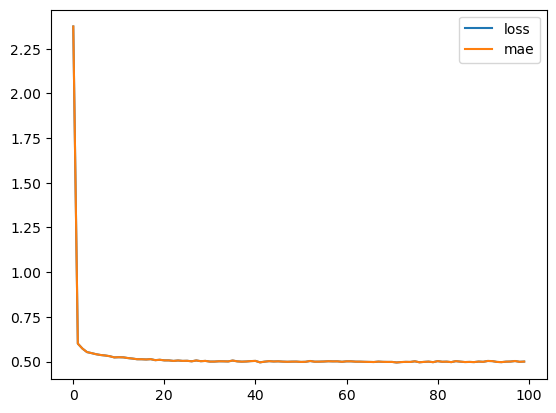

In [102]:
dd = pd.DataFrame(history.history).plot()

In [108]:
y_pred = insurance_model.predict(X_test_normal)
y_pred = tf.squeeze(
    y_pred, axis=1
)
diff = y_test - y_pred


10/10 [==============================] - 0s 2ms/step


<AxesSubplot:ylabel='Frequency'>

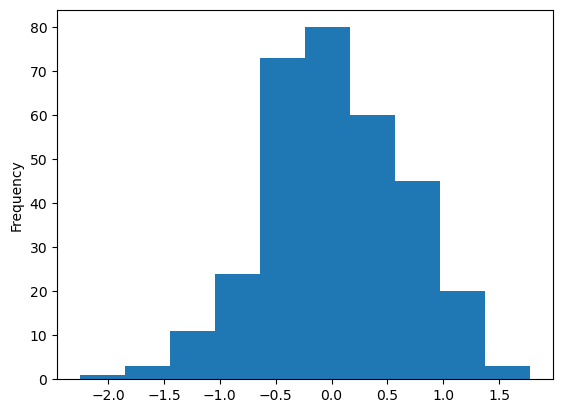

In [109]:
diff.plot(kind="hist")

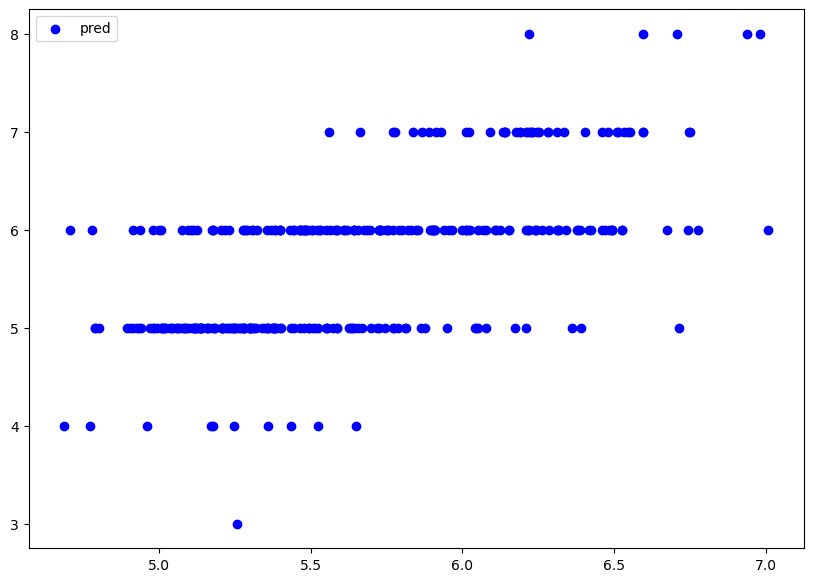

In [104]:
def plot_prediction(test_label, pred):
    plt.figure(figsize=(10,7))
    # plt.scatter(test_label,test_label, c="b", label="orginial")
    plt.scatter(pred, test_label, c="b", label="pred")
    plt.legend()
plot_prediction(y_test, y_pred)

In [12]:
from plotly import express as px
import plotly.graph_objects as go
import numpy as np

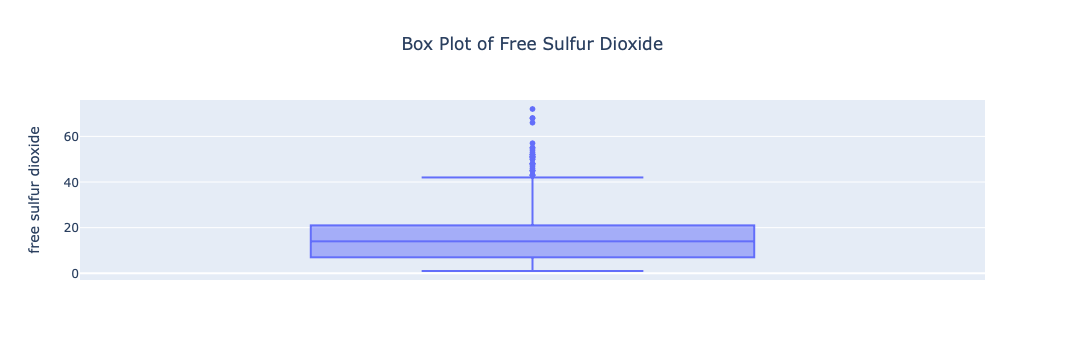

In [13]:


fig = go.Figure(px.box(red_wine_data, y = 'free sulfur dioxide', title = 'Box Plot of Free Sulfur Dioxide'))
fig.update_layout(title_x=0.5)
fig.show()

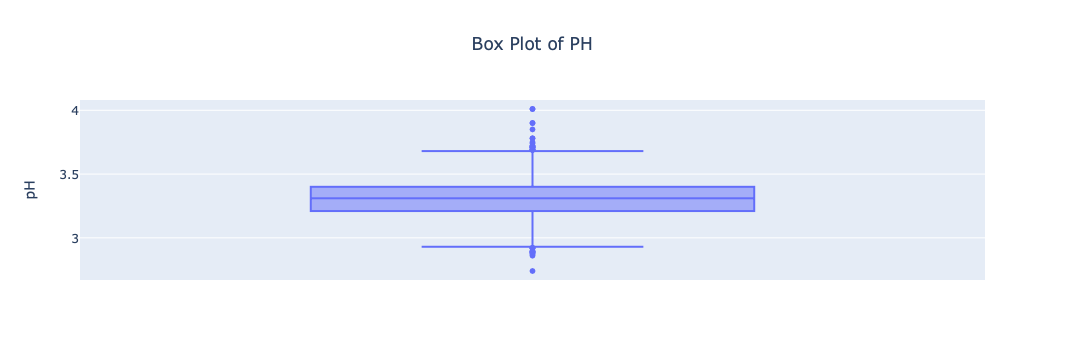

In [14]:
fig = go.Figure(px.box(red_wine_data, y = 'pH', title = 'Box Plot of PH'))
fig.update_layout(title_x=0.5)
fig.show()

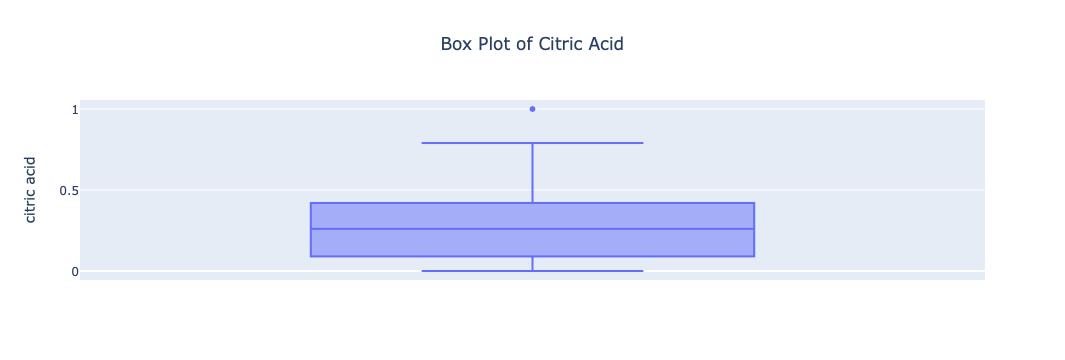

In [15]:
fig = go.Figure(px.box(red_wine_data, y= 'citric acid', title = 'Box Plot of Citric Acid'))
fig.update_layout(title_x=0.5)
fig.show()


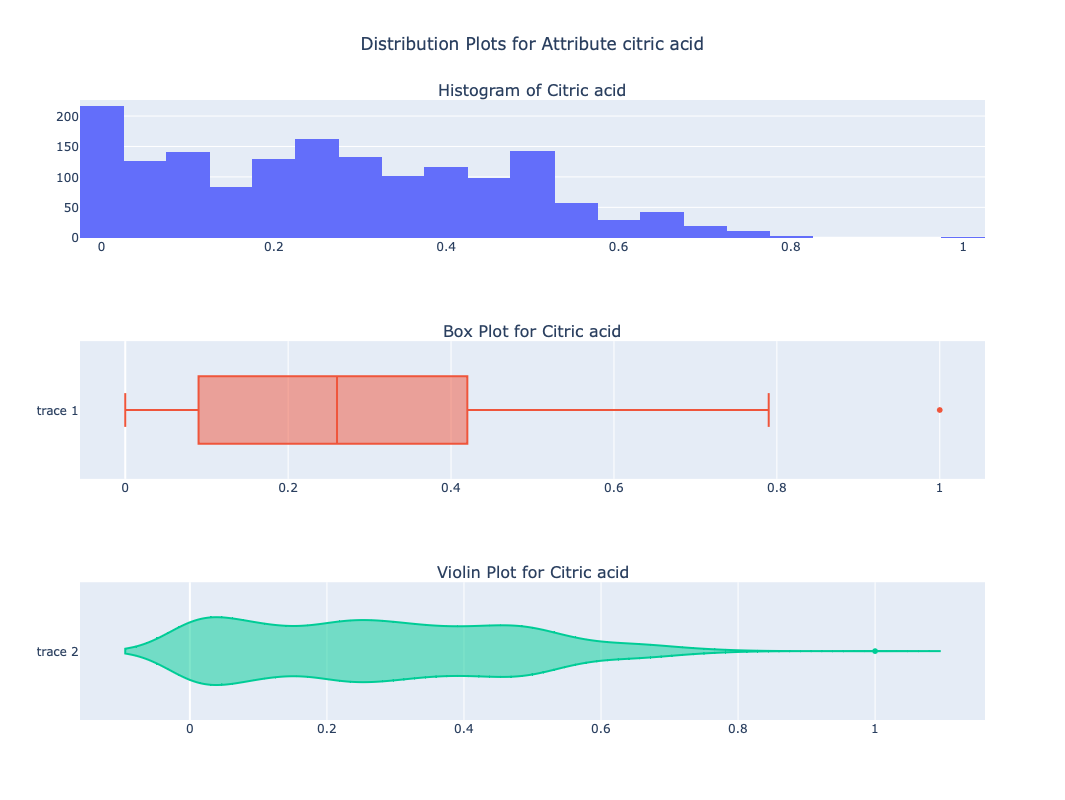

In [16]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(rows=3, cols=1, 
                    subplot_titles=("Histogram of Citric acid","Box Plot for Citric acid", "Violin Plot for Citric acid"))

fig.append_trace(go.Histogram(x = red_wine_data['citric acid']), row=1, col=1)

fig.append_trace(go.Box(
    x=red_wine_data['citric acid'],
), row=2, col=1)

fig.append_trace(go.Violin(
    x= red_wine_data['citric acid']
), row=3, col=1)


fig.update_layout(height=800, width=np.inf, title_text="Distribution Plots for Attribute citric acid", showlegend=False, title_x = 0.5)
fig.show()

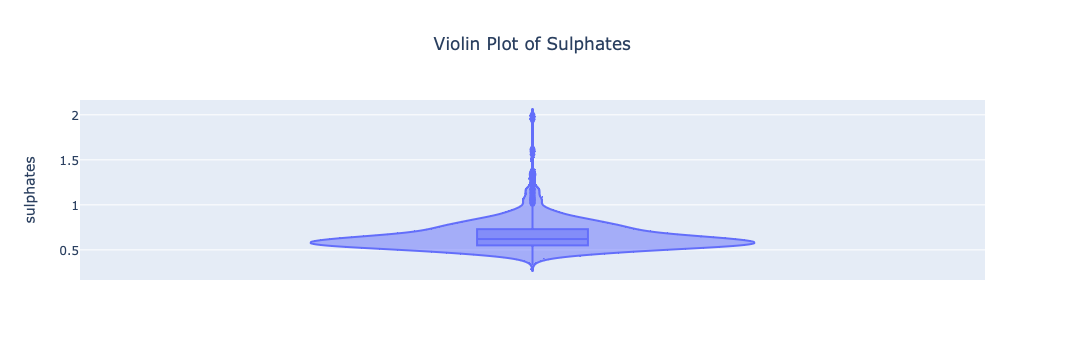

In [17]:
fig = go.Figure(px.violin(red_wine_data, y = 'sulphates', title = 'Violin Plot of Sulphates', box = True))
fig.update_layout(title_x=0.5)
fig.show()

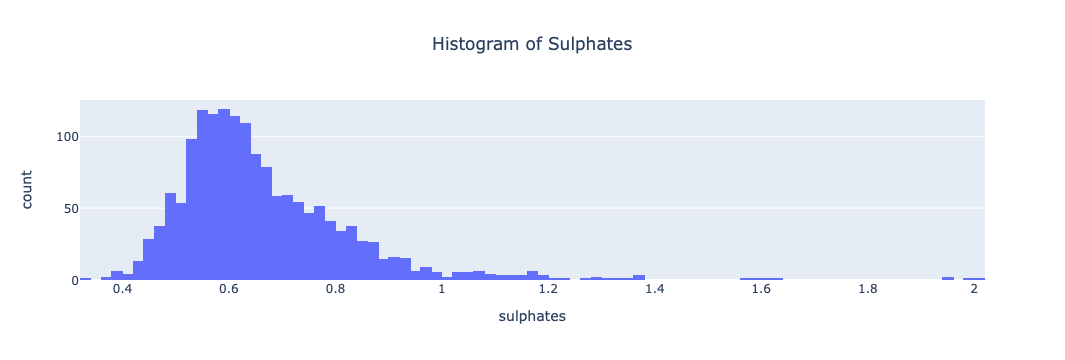

In [19]:
fig = go.Figure(px.histogram(red_wine_data, x = 'sulphates', title = 'Histogram of Sulphates'))
fig.update_layout(title_x=0.5)
fig.show()

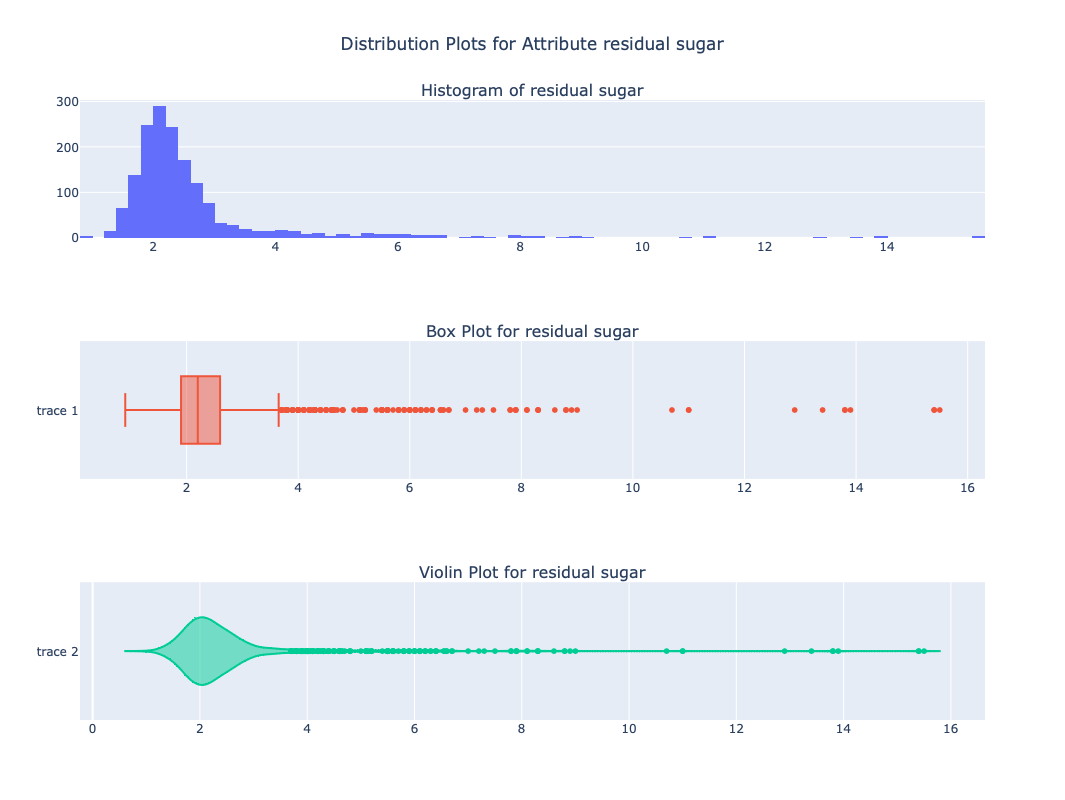

In [31]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(rows=3, cols=1, 
                    subplot_titles=("Histogram of residual sugar","Box Plot for residual sugar", "Violin Plot for residual sugar"))

fig.append_trace(go.Histogram(x = red_wine_data['residual sugar']), row=1, col=1)

fig.append_trace(go.Box(
    x=red_wine_data['residual sugar'],
), row=2, col=1)

fig.append_trace(go.Violin(
    x= red_wine_data['residual sugar']
), row=3, col=1)


fig.update_layout(height=800, width=np.inf, title_text="Distribution Plots for Attribute residual sugar", showlegend=False, title_x = 0.5)
fig.show()

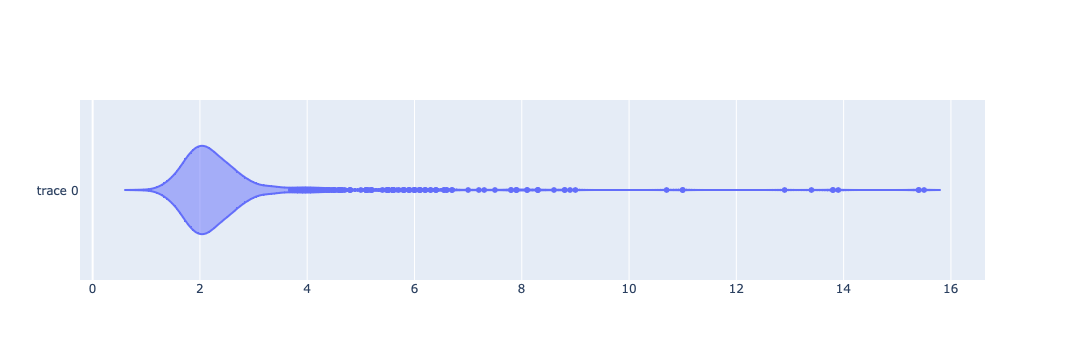

In [33]:
fig = go.Figure(go.Violin(x= red_wine_data['residual sugar']))
fig.update_layout(title_x=0.5)
fig.show()

Feature: 0, Score: 0.02499
Feature: 1, Score: -1.08359
Feature: 2, Score: -0.18256
Feature: 3, Score: 0.01633
Feature: 4, Score: -1.87423
Feature: 5, Score: 0.00436
Feature: 6, Score: -0.00326
Feature: 7, Score: -17.88116
Feature: 8, Score: -0.41365
Feature: 9, Score: 0.91633
Feature: 10, Score: 0.27620


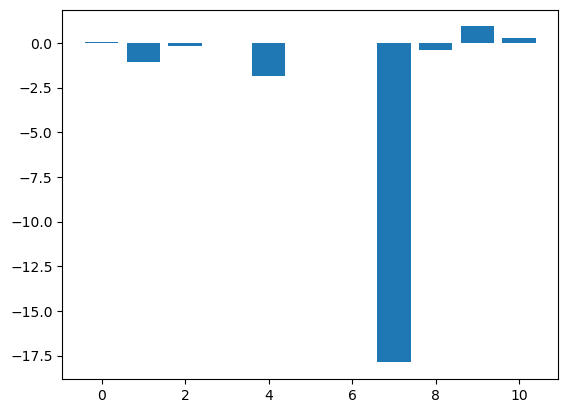

In [34]:
# linear regression feature importance
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot
# define dataset
X = red_wine_data.loc[:, red_wine_data.columns!="quality"]
y = red_wine_data["quality"]
# define the model
model = LinearRegression()
# fit the model
model.fit(X, y)
# get importance
importance = model.coef_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [38]:
X = red_wine_data.loc[:, (red_wine_data.columns!="quality")  & (red_wine_data.columns!="density")]
y = red_wine_data["quality"]
X, y 

(      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
 0               7.4             0.700         0.00             1.9      0.076   
 1               7.8             0.880         0.00             2.6      0.098   
 2               7.8             0.760         0.04             2.3      0.092   
 3              11.2             0.280         0.56             1.9      0.075   
 4               7.4             0.700         0.00             1.9      0.076   
 ...             ...               ...          ...             ...        ...   
 1594            6.2             0.600         0.08             2.0      0.090   
 1595            5.9             0.550         0.10             2.2      0.062   
 1596            6.3             0.510         0.13             2.3      0.076   
 1597            5.9             0.645         0.12             2.0      0.075   
 1598            6.0             0.310         0.47             3.6      0.067   
 
       free su

In [39]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler

In [40]:
ct = make_column_transformer((MinMaxScaler(), ["fixed acidity","volatile acidity","citric acid","residual sugar","chlorides","free sulfur dioxide","total sulfur dioxide","pH","sulphates","alcohol"]))

In [41]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)


In [42]:
ct.fit(X_train)

X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

X_train_normal, X_test_normal

(array([[0.36283186, 0.39041096, 0.31      , ..., 0.58267717, 0.22699387,
         0.49230769],
        [0.13274336, 0.06164384, 0.4       , ..., 0.4015748 , 0.13496933,
         0.53846154],
        [0.55752212, 0.18493151, 0.47      , ..., 0.44094488, 0.23312883,
         0.21538462],
        ...,
        [0.2300885 , 0.34246575, 0.06      , ..., 0.60629921, 0.10429448,
         0.16923077],
        [0.2920354 , 0.05479452, 0.35      , ..., 0.45669291, 0.26380368,
         0.53846154],
        [0.10619469, 0.11643836, 0.26      , ..., 0.51181102, 0.10429448,
         0.78461538]]),
 array([[0.27433628, 0.30136986, 0.08      , ..., 0.39370079, 0.17791411,
         0.18461538],
        [0.28318584, 0.26027397, 0.17      , ..., 0.51181102, 0.06748466,
         0.16923077],
        [0.53982301, 0.37671233, 0.22      , ..., 0.42519685, 0.37423313,
         0.23076923],
        ...,
        [0.32743363, 0.32876712, 0.25      , ..., 0.32283465, 0.09815951,
         0.21538462],
        [0.3

In [43]:
tf.random.set_seed(42)

insurance_model = tf.keras.Sequential()
insurance_model.add(tf.keras.layers.Dense(100))
insurance_model.add(tf.keras.layers.Dense(10))
insurance_model.add(tf.keras.layers.Dense(1))

insurance_model.compile(loss=tf.keras.losses.mae, optimizer=tf.keras.optimizers.SGD(), metrics=["mae"])

history = insurance_model.fit(X_train_normal, y_train, epochs=100, verbose=0)
y_pred = insurance_model.evaluate(X_test_normal, y_test)
y_pred

Metal device set to: Apple M1 Pro


2022-11-06 12:42:43.906854: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-11-06 12:42:43.907760: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2022-11-06 12:42:44.132272: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-11-06 12:42:44.441998: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


10/10 [==============================] - 0s 5ms/step - loss: 0.5048 - mae: 0.5048


2022-11-06 12:43:02.114094: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


[0.5047554969787598, 0.5047554969787598]

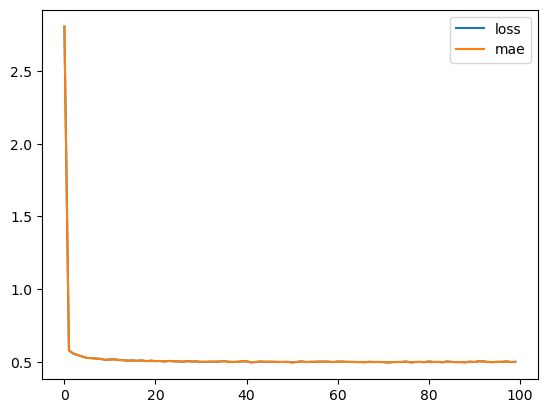

In [44]:
dd = pd.DataFrame(history.history).plot()

In [46]:
y_pred = insurance_model.predict(X_test_normal)
y_pred = tf.squeeze(
    y_pred, axis=1
)
diff = y_test - y_pred


10/10 [==============================] - 0s 2ms/step


2022-11-06 12:43:59.177298: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


<AxesSubplot:ylabel='Frequency'>

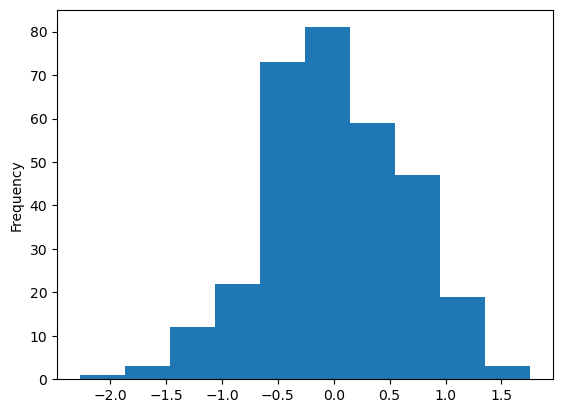

In [47]:
diff.plot(kind="hist")

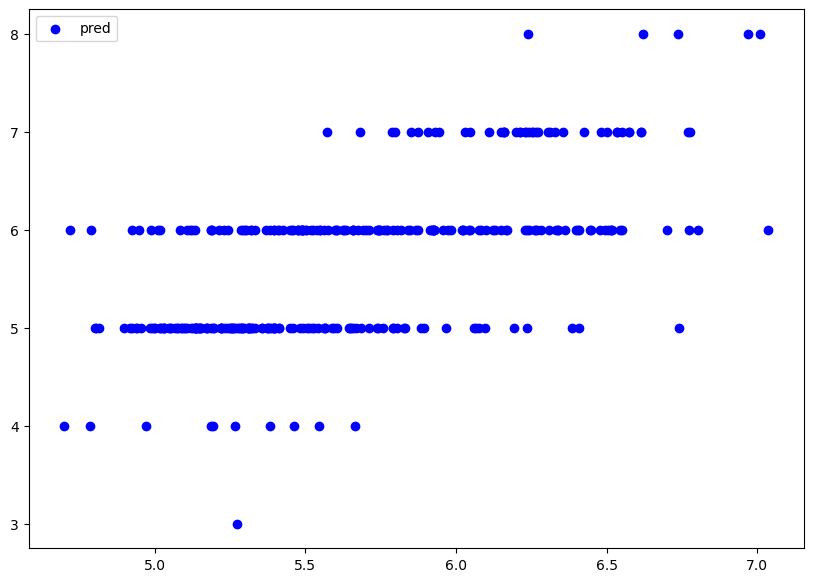

In [48]:
def plot_prediction(test_label, pred):
    plt.figure(figsize=(10,7))
    # plt.scatter(test_label,test_label, c="b", label="orginial")
    plt.scatter(pred, test_label, c="b", label="pred")
    plt.legend()
plot_prediction(y_test, y_pred)

In [50]:
X = red_wine_data.loc[:,['alcohol','sulphates','citric acid','volatile acidity']]
y = red_wine_data["quality"]
X, y

(      alcohol  sulphates  citric acid  volatile acidity
 0         9.4       0.56         0.00             0.700
 1         9.8       0.68         0.00             0.880
 2         9.8       0.65         0.04             0.760
 3         9.8       0.58         0.56             0.280
 4         9.4       0.56         0.00             0.700
 ...       ...        ...          ...               ...
 1594     10.5       0.58         0.08             0.600
 1595     11.2       0.76         0.10             0.550
 1596     11.0       0.75         0.13             0.510
 1597     10.2       0.71         0.12             0.645
 1598     11.0       0.66         0.47             0.310
 
 [1599 rows x 4 columns],
 0       5
 1       5
 2       5
 3       6
 4       5
        ..
 1594    5
 1595    6
 1596    6
 1597    5
 1598    6
 Name: quality, Length: 1599, dtype: int64)

In [51]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler

In [55]:
ct = make_column_transformer((MinMaxScaler(), ["volatile acidity","citric acid","sulphates","alcohol"]))

In [56]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)


In [57]:
ct.fit(X_train)

X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

X_train_normal, X_test_normal

(array([[0.39041096, 0.31      , 0.22699387, 0.49230769],
        [0.06164384, 0.4       , 0.13496933, 0.53846154],
        [0.18493151, 0.47      , 0.23312883, 0.21538462],
        ...,
        [0.34246575, 0.06      , 0.10429448, 0.16923077],
        [0.05479452, 0.35      , 0.26380368, 0.53846154],
        [0.11643836, 0.26      , 0.10429448, 0.78461538]]),
 array([[0.30136986, 0.08      , 0.17791411, 0.18461538],
        [0.26027397, 0.17      , 0.06748466, 0.16923077],
        [0.37671233, 0.22      , 0.37423313, 0.23076923],
        ...,
        [0.32876712, 0.25      , 0.09815951, 0.21538462],
        [0.10273973, 0.39      , 0.19631902, 0.43076923],
        [0.44178082, 0.04      , 0.10429448, 0.2       ]]))

In [146]:
tf.random.set_seed(42)

insurance_model = tf.keras.Sequential()
insurance_model.add(tf.keras.layers.Dense(5))
insurance_model.add(tf.keras.layers.Dense(5))
insurance_model.add(tf.keras.layers.Dense(1))

insurance_model.compile(loss=tf.keras.losses.mae, optimizer=tf.keras.optimizers.Adam(), metrics=["mae"])

history = insurance_model.fit(X_train_normal, y_train, epochs=100, verbose=0)
y_pred = insurance_model.evaluate(X_test_normal, y_test)
y_pred

2022-11-09 07:28:02.600023: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


10/10 [==============================] - 0s 4ms/step - loss: 0.5203 - mae: 0.5203


2022-11-09 07:28:21.423709: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


[0.520253598690033, 0.520253598690033]

In [147]:
# dd = pd.DataFrame(history.history).plot()

In [148]:
y_pred = insurance_model.predict(X_test_normal)
y_pred = tf.squeeze(
    y_pred, axis=1
)
diff = y_test - y_pred


10/10 [==============================] - 0s 2ms/step


2022-11-09 07:28:21.533311: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


In [149]:
# diff.plot(kind="hist")

In [150]:
def plot_prediction(test_label, pred):
    plt.figure(figsize=(10,7))
    # plt.scatter(test_label,test_label, c="b", label="orginial")
    plt.scatter(pred, test_label, c="b", label="pred")
    plt.legend()
# plot_prediction(y_test, y_pred)

In [151]:
y_pred_round = np.round_(y_pred)
# plot_prediction(y_test, y_pred_round)

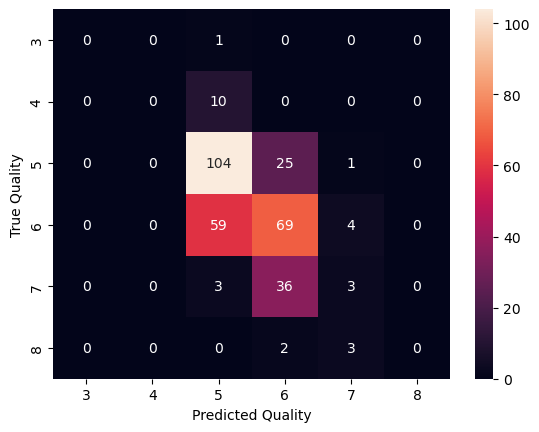

In [152]:
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score, recall_score, precision_score
import seaborn as sns
#Confussion Matrix for the Random Forest Regression Model
label_aux = plt.subplot()
cm_random_forest_regression = confusion_matrix(y_test,y_pred_round)
cm_rf = pd.DataFrame(cm_random_forest_regression,
                     index = ['3','4','5','6','7','8'], 
                     columns = ['3','4','5','6','7','8'])
sns.heatmap(cm_rf,annot=True,fmt="d")
label_aux.set_xlabel('Predicted Quality');label_aux.set_ylabel('True Quality');